In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [316]:
train_data=pd.read_excel(r"Data_Train.xlsx")

In [397]:
test_data=pd.read_excel("Test_set.xlsx")

In [317]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [398]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [399]:
train_data.shape,test_data.shape

((10682, 10), (2671, 10))

In [318]:
pd.set_option('display.max_columns',None)

In [319]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [320]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [400]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [321]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [322]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [402]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [323]:
train_data.dropna(inplace=True)

In [403]:
test_data.dropna(inplace=True)

In [324]:
train_data.shape

(10682, 11)

In [325]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
27h 55m      1
29h 10m      1
32h 55m      1
30h 10m      1
47h          1
Name: Duration, Length: 368, dtype: int64

In [405]:
test_data["Duration"].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
24h 15m      1
32h 20m      1
30h 25m      1
29h 55m      1
22h 50m      1
Name: Duration, Length: 320, dtype: int64

In [326]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [327]:
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [328]:
#train_data["Journey_year"]=pd.to_datetime(train_data["Date_of_Journey"],format='%d/%m/%Y').dt.year

In [329]:
#since we have converted Date_of_Journey columns into integer, now we can drop as it is of no issue.
train_data.drop(["Date_of_Journey"],axis=1, inplace=True)

In [406]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [408]:
test_data["Journey_day"]=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data['Journey_month']=pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month


In [410]:
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [411]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [330]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [331]:
train_data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [332]:
#Departure time is when plane leave the gate

#extracting hours
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

#extracting minutes
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute


In [412]:
test_data['Dept_minute']=pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data['Dept_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour

In [333]:
#now we can drop Date_Time column as we have converted time columns
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [413]:
test_data.drop(['Dep_Time'],axis=1,inplace=True)

In [334]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [414]:
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dept_minute,Dept_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,30,17
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,20,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,15,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,0,8
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,55,23


In [335]:
#Arrival time is when the plane pulls up the gate
train_data["Arrival_hour"]=pd.to_datetime(train_data.Arrival_Time).dt.hour

train_data["Arrival_min"]=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [415]:
test_data["Arrival_minute"]=pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data["Arrival_hour"]=pd.to_datetime(test_data['Arrival_Time']).dt.hour

In [336]:
#now we can delete Arrival_Time columns
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [416]:
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [337]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [417]:
test_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,30,17,25,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,20,6,20,10


In [338]:
#samething we can do with Duaration column aslo
#train_data["Duration_min"]=pd.to_datetime(train_data.Duration,errors='coerce').dt.minute
#train_data["Duration_hour"]=pd.to_datetime(train_data.Duration,errors='coerce').dt.hour

In [ ]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [441]:
test_duration=list(test_data['Duration'])
for i in range(len(test_duration)):
    #print(test_duration[i])
    if 'h' in test_duration[i]:
        test_duration[i]=test_duration[i].strip()+" 0m"
        print(test_duration[i])
    else:
        test_duration[i]="0h "+test_duration[i]
test_duration_hour=[]
test_duration_minute=[]

for i in range (len(test_duration)):
    test_duration_hour.append(int(test_duration[i].split(sep='h')[0]))
    test_duration_minute.append(int(test_duration[i].split(sep='m')[0].split()[-1]))


10h 55m 0m
4h 0m
23h 45m 0m
13h 0m
2h 50m 0m
18h 20m 0m
15h 5m 0m
5h 15m 0m
2h 45m 0m
6h 5m 0m
28h 55m 0m
9h 20m 0m
10h 15m 0m
4h 40m 0m
17h 20m 0m
10h 50m 0m
9h 15m 0m
12h 15m 0m
9h 10m 0m
9h 20m 0m
14h 50m 0m
14h 5m 0m
11h 35m 0m
13h 30m 0m
2h 50m 0m
12h 25m 0m
2h 30m 0m
25h 30m 0m
19h 25m 0m
7h 0m
2h 30m 0m
11h 40m 0m
7h 5m 0m
3h 0m
1h 25m 0m
2h 40m 0m
1h 25m 0m
6h 5m 0m
17h 5m 0m
10h 40m 0m
2h 30m 0m
12h 30m 0m
1h 30m 0m
23h 40m 0m
5h 15m 0m
2h 20m 0m
23h 35m 0m
1h 30m 0m
27h 40m 0m
13h 30m 0m
28h 20m 0m
5h 45m 0m
26h 25m 0m
5h 40m 0m
2h 15m 0m
2h 55m 0m
5h 45m 0m
7h 30m 0m
5h 20m 0m
25h 50m 0m
13h 15m 0m
26h 20m 0m
5h 45m 0m
5h 40m 0m
2h 40m 0m
2h 50m 0m
5h 25m 0m
8h 45m 0m
3h 0m
7h 20m 0m
1h 30m 0m
21h 10m 0m
16h 0m
7h 50m 0m
1h 30m 0m
3h 0m
2h 50m 0m
19h 25m 0m
2h 55m 0m
14h 5m 0m
2h 50m 0m
16h 5m 0m
5h 55m 0m
2h 30m 0m
10h 15m 0m
13h 50m 0m
2h 15m 0m
11h 55m 0m
2h 30m 0m
13h 20m 0m
18h 10m 0m
28h 10m 0m
5h 0m
23h 15m 0m
1h 15m 0m
1h 20m 0m
13h 25m 0m
6h 15m 0m
1h 20m 0m
10h 10m

In [340]:
train_data["duration_hours"]=duration_hours
train_data["duration_mins"]=duration_mins


In [443]:
test_data['test_duration_hour']=test_duration_minute
test_data['test_duration_minute']=test_duration_minute

In [341]:
train_data.drop(["Duration"],axis=1,inplace=True)

In [444]:
test_data.drop(['Duration'],axis=1,inplace=True)

In [342]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [445]:
test_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,test_duration_hour,test_duration_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,30,17,25,4,55,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,20,6,20,10,0,0


In [343]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [344]:
Airline=train_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

In [446]:
test_Airline=test_data[['Airline']]
test_Airline=pd.get_dummies(test_Airline,drop_first=True)

In [448]:
test_Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0


In [449]:
Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [346]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

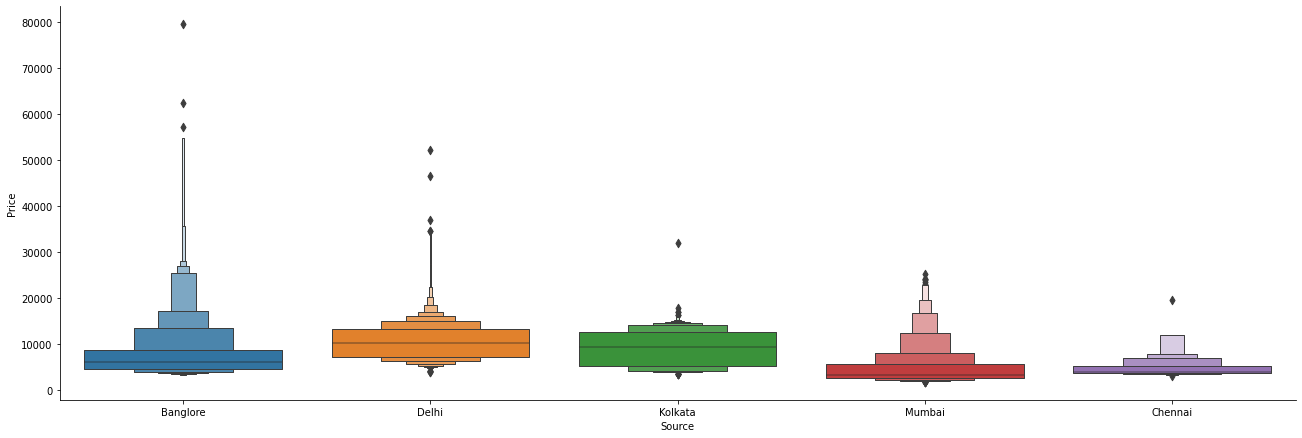

In [347]:
sns.catplot(y="Price",x="Source", data=train_data.sort_values("Price" ,ascending=False),kind="boxen",height=6, aspect=3)


In [348]:
Source=pd.get_dummies(train_data[["Source"]], drop_first=True)

In [450]:
test_Source=pd.get_dummies(test_data[['Source']],drop_first=True)

In [452]:
test_Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [349]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [350]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [351]:
#train_data.drop(["Source"],axis=1, inplace=True)

In [352]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [353]:
Destination=pd.get_dummies(train_data[["Destination"]],drop_first=True)

In [456]:
test_Destination=pd.get_dummies(test_data[['Destination']],drop_first=True)

In [457]:
test_Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0


In [354]:
Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [355]:
train_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [356]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [360]:
train_data.drop(["Route"],axis=1,inplace=True)

In [364]:
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace=True)

In [362]:
train_data.drop(["Additional_Info"],axis=1,inplace=True)

In [453]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [454]:
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [455]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,test_duration_hour,test_duration_minute
0,Jet Airways,Delhi,Cochin,1,6,6,30,17,25,4,55,55
1,IndiGo,Kolkata,Banglore,1,12,5,20,6,20,10,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,15,19,0,19,45,45
3,Multiple carriers,Delhi,Cochin,1,21,5,0,8,0,21,0,0
4,Air Asia,Banglore,Delhi,0,24,6,55,23,45,2,50,50


In [367]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [366]:
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [459]:
test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [368]:
final_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [461]:
final_test=pd.concat([test_data,test_Airline,test_Source,test_Destination],axis=1)

In [373]:
final_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [462]:
final_test.head()

,Total_Stops,Journey_day,Journey_month,Dept_minute,Dept_hour,Arrival_minute,Arrival_hour,test_duration_hour,test_duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,30,17,25,4,55,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,20,6,20,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,15,19,0,19,45,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,0,8,0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,55,23,45,2,50,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [468]:
final_train.shape,final_test.shape

((10682, 30), (2671, 29))

In [464]:
final_test.columns,final_train.columns

(Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dept_minute',
        'Dept_hour', 'Arrival_minute', 'Arrival_hour', 'test_duration_hour',
        'test_duration_minute', 'Airline_Air India', 'Airline_GoAir',
        'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
        'Airline_Multiple carriers',
        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
        'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
        'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
        'Destination_New Delhi'],
       dtype='object'),
 Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
        'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
        'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
        'Airline_Jet Airways', 'Airline_Jet Airways Business',
        

In [378]:
final_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [467]:
final_test['Airline_Trujet']=0

In [469]:
final_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dept_minute',
       'Dept_hour', 'Arrival_minute', 'Arrival_hour', 'test_duration_hour',
       'test_duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Trujet'],
      dtype='object')

In [379]:
final_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [472]:
X=final_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [386]:
y=final_train.loc[:,['Price']]

In [ ]:
sel=ExtraTreesRegressor(n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,)

In [390]:
from sklearn.ensemble import ExtraTreesRegressor
sel=ExtraTreesRegressor()
sel.fit(X,y)

c:\users\mnarware\appdata\local\continuum\anaconda3\envs\flightpred\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor()

In [392]:
print(sel.feature_importances_)

[2.34346490e-01 1.44285818e-01 5.39891468e-02 2.41226125e-02
 2.12741975e-02 2.76964617e-02 1.88769298e-02 1.04382238e-01
 1.74889482e-02 1.08302559e-02 1.82841111e-03 1.77946879e-02
 1.43192923e-01 6.77109992e-02 2.07696606e-02 8.36406209e-04
 3.00994150e-03 9.35712084e-05 5.09029809e-03 8.28143697e-05
 6.36306158e-04 1.34060619e-02 3.31444306e-03 7.25960083e-03
 9.64337843e-03 1.64301532e-02 6.46179053e-03 4.49936656e-04
 2.46955184e-02]


<AxesSubplot:>

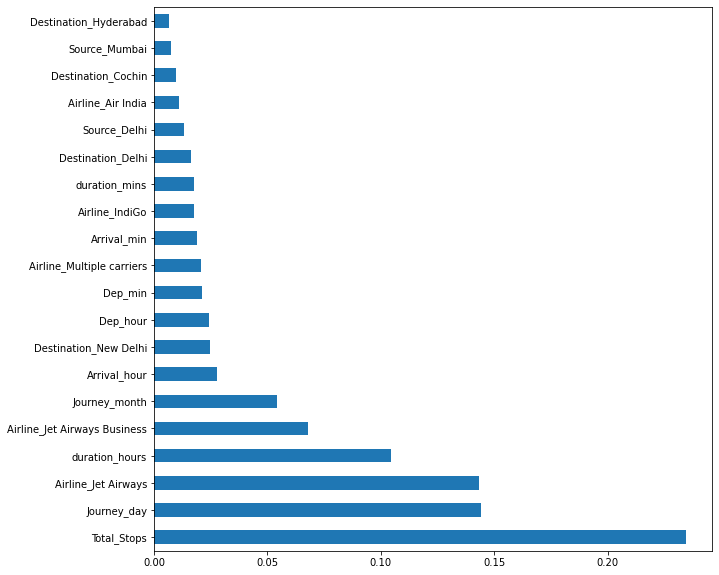

In [394]:
plt.figure(figsize=(10,10))
feature_importances=pd.Series(sel.feature_importances_,index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')

<AxesSubplot:>

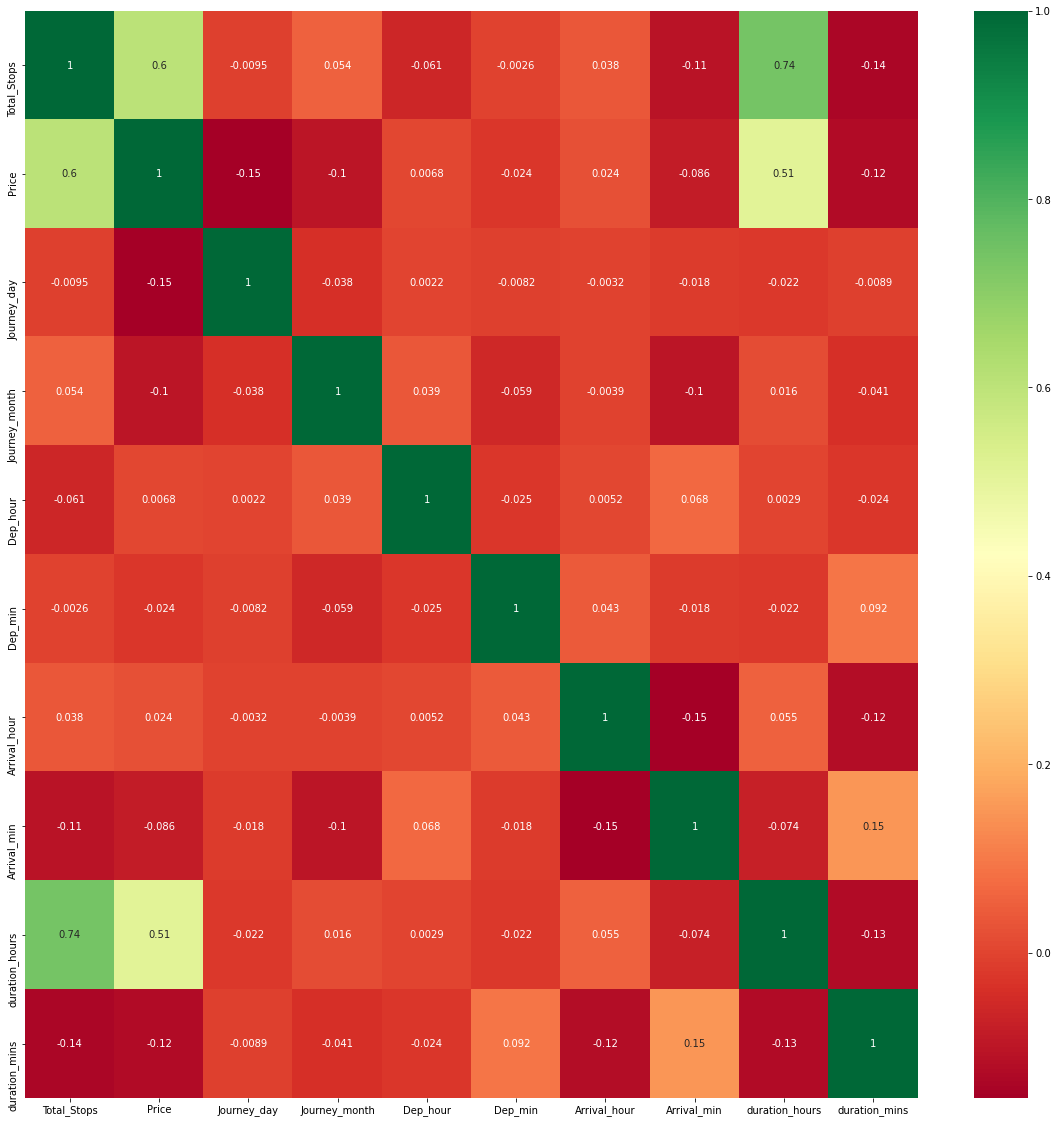

In [481]:
#find correlations between dependent and independent attributes.
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True, cmap='RdYlGn')

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [475]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [505]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

c:\users\mnarware\appdata\local\continuum\anaconda3\envs\flightpred\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [506]:
reg.score(X_train,y_train)

0.9558301675376405

In [507]:
y_pred=(reg.predict(X_test))

In [554]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8103173464699709

In [555]:
reg.score(X_test,y_test)

0.8103165152052263

In [579]:
pred=pd.DataFrame(y_test["Price"],columns=["test"])

In [582]:
#sns.distplot(y_test-y_pred)              ##error
#plt.show()

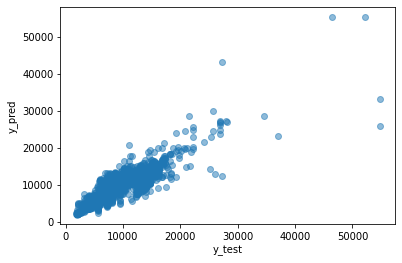

In [584]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [585]:
from sklearn import metrics

In [589]:
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



MSE 4450557.288254563
MAE 1242.348619560131
RMSE 2109.6343968220094


In [591]:
from sklearn.model_selection import RandomizedSearchCV

In [593]:
#Randomized Search Cross Validation

#Number of trees in Random Forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#number of features to consider at every split
max_features=['auto','sqrt']

#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

#minimum sample of required to split a node
min_samples_split=[2,5,10,15,100]

#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [594]:
metrics.r2_score(y_test,y_pred)

0.8103173464699709

In [600]:
user_city=input("Enter City :")

def city(user_city)
    city=['Cochin','Banglore','Delhi','New Delhi','Hyderabad','Kolkata']
    num=0
    for i in range(len(city)):
        if city[i]==user_city:
            num=1
        else:
            num=0
        print(city[i],num)


Enter City :New Delhi
Cochin 0
Banglore 0
Delhi 0
New Delhi 1
Hyderabad 0
Kolkata 0


In [603]:
import pickle

#open a file where you want to store a data

file=open("flight_rf.pkl",'wb')

#dump information that file
pickle.dump(reg,file)


In [604]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [606]:
conda info --env

# conda environments:
#
Note: you may need to restart the kernel to use updated packages.

base                     C:\Users\mnarware\AppData\Local\Continuum\anaconda3
flightpred               C:\Users\mnarware\AppData\Local\Continuum\anaconda3\envs\flightpred
mcncarpred               C:\Users\mnarware\AppData\Local\Continuum\anaconda3\envs\mcncarpred
testenv                  C:\Users\mnarware\AppData\Local\Continuum\anaconda3\envs\testenv



In [607]:
final_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')